In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
# 필요한 모듈 임포트
import tensorflow as tf
import numpy as np
import pandas as pd
import random

import tensorflow as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

In [ ]:
# seed를 설정해서 학습시마다 동일한 결과 유도 시도 (의도대로 동작은 X)
def set_random_seed(seed_value):
  np.random.seed(seed_value)
  random.seed(seed_value)
  tf.random.set_seed(seed_value)

In [ ]:
# 0~1 사이의 값의 float 32로 변경하는 함수
def get_preprocessed_data(images, labels, scaling=True):

  # 학습과 테스트 이미지 array를 0~1  사이 값으로 scale 및 float32 자료형으로 변환
  if scaling:
    images = np.array(images/255.0, dtype=np.float32)
  else:
    images = np.array(images, dtype=np.float32) # 자료형만 변환

  labels = np.array(labels, dtype=np.float32) # label도 float로 변환

  return images, labels

def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels, scaling=False)
  # OHE 적용
  oh_labels = to_categorical(labels)
  return images, oh_labels

# 학습/검증/테스트 데이터 셋에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2023):
  # 학습 및 테스트 데이터 셋을 0~1사이 값 float32 로 변경 및 OHE 적용
  train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
  test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

  # 학습 데이터를 검증 데이터로 다시 분리
  tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

  return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

# reandom seed는 2023으로 고정
set_random_seed(2023)

# CIFAR10 데이터 재로딩 및 Scaling/OHE 전처리 적용하려 학습/검증 데이터 세트 생성
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('(before spliting validation data)','\ntrain data :', train_images.shape, train_labels.shape, '\nTest data : ', test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
  get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

# 학습/검증/테스트 세트 크기 출력
print('\nTrain data :',tr_images.shape, tr_oh_labels.shape, '\nValidation data : ', val_images.shape, val_oh_labels.shape, '\nTest data : ',test_images.shape, test_oh_labels.shape)

170498071/170498071 [==============================] - 2s 0us/step
(before spliting validation data) 
train data : (50000, 32, 32, 3) (50000, 1) 
Test data :  (10000, 32, 32, 3) (10000, 1)

Train data : (42500, 32, 32, 3) (42500, 10) 
Validation data :  (7500, 32, 32, 3) (7500, 10) 
Test data :  (10000, 32, 32, 3) (10000, 10)


### 데이터셋 이미지 출력하는 함수

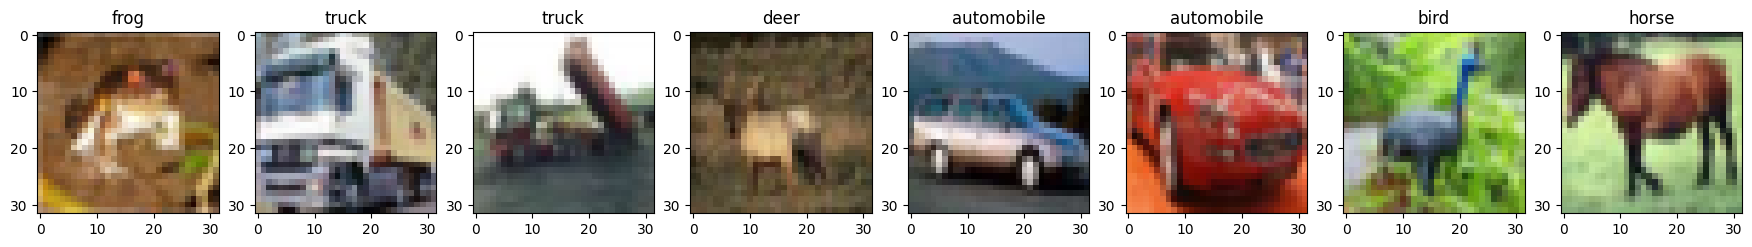

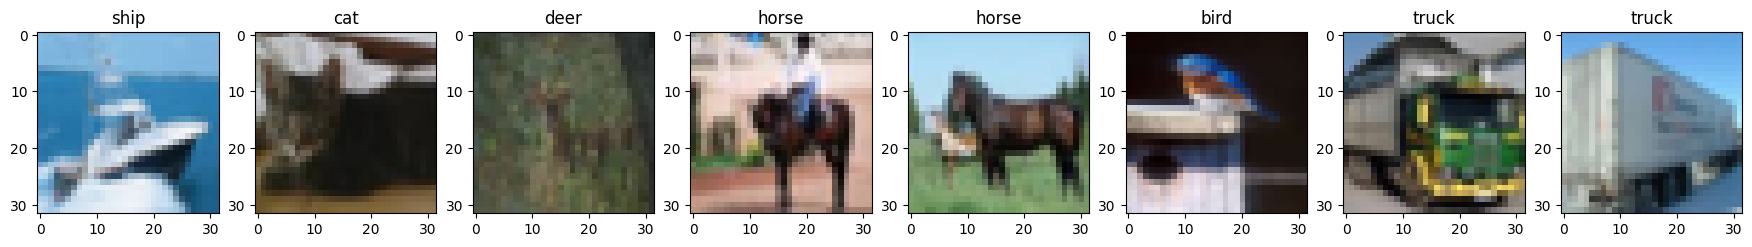

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog', 'horse', 'ship', 'truck'])

# 이미지 보여주는 함수

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i]) # 서브플롯에 i번째의 이미지를 보여준다
    label = labels[i].squeeze() # 1차원 > 0차원
    axs[i].set_title(NAMES[int(label)]) # NAMES 배열에서 해당 label에 해당하는 문자를 서브플롯 제목으로 한다

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [ ]:
# 이미지 데이터도 확인해보자
tr_images[:10]

array([[[[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   1.],
         [  3.,   3.,   1.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   2.],
         [  3.,   3.,   2.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   4.],
         [  3.,   3.,   4.]],

        ...,

        [[ 21.,  18.,  39.],
         [ 18.,  14.,  37.],
         [ 15.,  11.,  35.],
         ...,
         [ 16.,  13.,  31.],
         [ 10.,   7.,  25.],
         [  8.,   5.,  22.]],

        [[ 23.,  20.,  40.],
         [ 20.,  17.,  39.],
         [ 20.,  17.,  39.],
         ...,
         [ 25.,  23.,  40.],
         [ 21.,  18.,  37.],
         [ 19.,  16.,  35.]],

        [[ 26.,  23.,  42.],
       

In [ ]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

### ImageDataGenerator로 Augmentation 설정하고 학습용, 검증용 Generator 생성

In [ ]:
from random import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
  # rotation_range=20,
  # zoom_range=(0.7, 0.9),
  horizontal_flip=True,
  # vertical_flip=True,
  rescale=1/255.0
)

valid_generator = ImageDataGenerator(rescale=1/255.0) # valid에는 aug 적용 X

flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=True)

### Keras CNN 모델 생성

In [ ]:
# 필요한 모듈 임포트

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
def create_model(verbose=False):
  input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

  # x = Conv2D(filter=32, kernel_size=(5,5), padding='valid', activation='relu')(input_tensor)
  x = Conv2D(filters=64, kernel_size=(3,3), padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=64, kernel_size=(3,3), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=2)(x)

  x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # Flatten 대신 Global AveragePooling 을 적용한다
  x = GlobalAveragePooling2D()(x)
  x = Dropout(rate=0.5)(x)
  x = Dense(50, activation='relu', name='fc1')(x)
  x = Dropout(rate=0.2)(x)
  output = Dense(10, activation='softmax', name='output')(x)

  model = Model(inputs=input_tensor, outputs=output)
  if verbose:
    model.summary()

  return model

In [ ]:
model = create_model(verbose=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번의 iteration 내에 validation loss가 향상되지 않으면 learning rate를 기존 learning rate * 0.2 로 줄임
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode=min, verbose=1)
# 10번 interation 내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode=min, verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                             

In [ ]:
image_batch, label_batch = next(flow_tr_gen)
print(image_batch.shape, label_batch.shape)
print(image_batch[0])

(64, 32, 32, 3) (64, 10)
[[[0.19607845 0.3529412  0.12156864]
  [0.18823531 0.3921569  0.11764707]
  [0.23529413 0.454902   0.15686275]
  ...
  [0.9568628  0.9568628  0.9568628 ]
  [0.9568628  0.9568628  0.9568628 ]
  [0.9686275  0.9686275  0.9686275 ]]

 [[0.18039216 0.37647063 0.08235294]
  [0.16470589 0.4156863  0.04313726]
  [0.25490198 0.52156866 0.10588236]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.13333334 0.34509805 0.07450981]
  [0.15686275 0.427451   0.03921569]
  [0.23137257 0.52156866 0.08235294]
  ...
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  [1.         1.         1.        ]]

 ...

 [[0.17254902 0.227451   0.12156864]
  [0.14901961 0.22352943 0.08235294]
  [0.12156864 0.20784315 0.0627451 ]
  ...
  [0.7725491  0.8352942  0.60784316]
  [0.7607844  0.8117648  0.57254905]
  [0.78823537 0.8196079  0.5529412 ]]

 [[0.07058824 0.14901961 0.07058824]
  [0.0470588

In [ ]:
tr_images.shape, val_images.shape

((42500, 32, 32, 3), (7500, 32, 32, 3))

In [ ]:
'''
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),
                    callbacks=[rlr_cb, ely_cb])
'''

# steps 횟수 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. stenps = ceil(학습데이터 건수 / BATCH_SIZE)
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]
history = model.fit(flow_tr_gen, epochs=40,
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)),
                    validation_data=flow_val_gen,
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/40
665/665 [==============================] - 32s 24ms/step - loss: 1.4625 - accuracy: 0.4698 - val_loss: 1.4854 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 15s 23ms/step - loss: 1.0438 - accuracy: 0.6310 - val_loss: 1.4383 - val_accuracy: 0.5216 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 16s 24ms/step - loss: 0.8580 - accuracy: 0.7032 - val_loss: 1.1745 - val_accuracy: 0.5951 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 15s 23ms/step - loss: 0.7410 - accuracy: 0.7489 - val_loss: 0.9225 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 15s 23ms/step - loss: 0.6338 - accuracy: 0.7871 - val_loss: 0.8151 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 15s 23ms/step - loss: 0.5735 - accuracy: 0.8084 - val_loss: 0.7873 - val_accuracy: 0.7413 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 16s 

In [ ]:
# 테스트세트에 대에서도 generator 만들기
test_genenrator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_genenrator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

157/157 [==============================] - 1s 9ms/step - loss: 0.4615 - accuracy: 0.8910


[0.4614783227443695, 0.890999972820282]

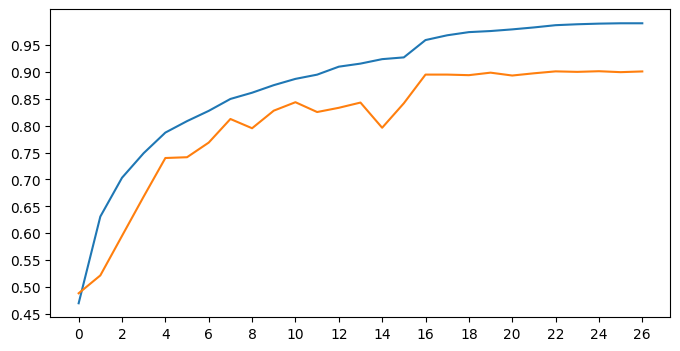

In [ ]:
# 학습 결과를 시각화
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
  plt.figure(figsize=(8,4))
  plt.yticks(np.arange(0, 1, 0.05))
  plt.xticks(np.arange(0, 30, 2))
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')


show_history(history)

### 원본 이미지 상황에 맞지 않거나 과도한 Augmentation은 오히려 성능을 저하시킴

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습 데이터셋에 대해 Generator 생성
train_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=(0.7, 0.9),
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0
)

# 검증 데이터셋에 대해 Generator 생성
valid_generator = ImageDataGenerator(rescale=1/255.0) # 검증데이터는 aug X (학습용도 아니므로)

# generator의 파이프라인
flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=False)

# 모델 생성, 컴파일
model = create_model()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# steps 횟수 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. steps = ceil(학습데이터건수 / BATCH_SIZE)
tr_data_len = tr_images.shape[0] # 학습 데이터셋의 개수
val_data_len = val_images.shape[0]

# 학습 옵션을 설정하고 history변수에 저장
history = model.fit(flow_tr_gen, epochs=40,
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)),
                    validation_data=flow_val_gen,
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),
                    callbacks=[rlr_cb, ely_cb], verbose=1)

Epoch 1/40
665/665 [==============================] - 40s 52ms/step - loss: 1.7883 - accuracy: 0.3360 - val_loss: 2.4253 - val_accuracy: 0.2257 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 45s 68ms/step - loss: 1.4573 - accuracy: 0.4697 - val_loss: 2.2444 - val_accuracy: 0.3485 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 44s 66ms/step - loss: 1.2828 - accuracy: 0.5410 - val_loss: 1.5823 - val_accuracy: 0.4395 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 28s 42ms/step - loss: 1.1673 - accuracy: 0.5878 - val_loss: 1.5074 - val_accuracy: 0.5016 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 28s 42ms/step - loss: 1.0832 - accuracy: 0.6176 - val_loss: 2.1435 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 30s 45ms/step - loss: 1.0084 - accuracy: 0.6474 - val_loss: 1.2752 - val_accuracy: 0.5836 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 28s 

In [ ]:
# 테스트 데이터셋에 대해 Genenrator 생성
test_genenrator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_genenrator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen) # 테스트는 평가만 한다

157/157 [==============================] - 2s 10ms/step - loss: 0.5539 - accuracy: 0.8233


[0.5539165735244751, 0.8233000040054321]